In [4]:
pip install python_louvain

  Using cached python-louvain-0.14.tar.gz (19 kB)
  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9291 sha256=d4f257f2f83fd7fe7cb8327dcd6050982c8a6dc023c87cc8fbe5d4d6f600d449
  Stored in directory: /Users/charles/Library/Caches/pip/wheels/bb/4b/ac/10971da44a20533855fd2f86b169e3044a292cc5ca070d1899
Successfully built python-louvain
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import community as louvain_community
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [6]:
df_data = pd.read_csv('data/dij_joint_civ.csv')

In [7]:
df_data.head()

,i,j,D_ij,civ_i,civ_j,civ_ij,comciv
0,AE,AL,-6.799441,islam,islam,islam,1
1,AE,AM,-2.050316,islam,ortho,NaN,0
2,AE,AO,-6.755312,islam,afric,NaN,0
3,AE,AR,-5.421352,islam,latam,NaN,0
4,AE,AS,-1.580247,islam,NaN,NaN,0


In [97]:
#df_data[df_data['i'] == 'MN']

,i,j,D_ij,civ_i,civ_j,civ_ij,comciv
9182,MN,MO,0.526756,buddh,NaN,NaN,0
9183,MN,MP,-11.240130,buddh,NaN,NaN,0
9184,MN,MR,-11.240130,buddh,afric,NaN,0
9185,MN,MT,0.374018,buddh,wstrn,NaN,0
9186,MN,MU,0.256170,buddh,afric,NaN,0
9187,MN,MX,-4.825312,buddh,latam,NaN,0
9188,MN,MY,-11.240130,buddh,islam,NaN,0
9189,MN,MZ,-0.099844,buddh,afric,NaN,0
9190,MN,NC,-11.240130,buddh,NaN,NaN,0
9191,MN,NG,1.071199,buddh,afric,NaN,0


In [77]:
codes = pd.read_csv('data/codes.csv')
codes.set_index('Code', inplace=True)
codes.drop('Index', inplace=True, axis=1)
codes.head()

,Country
Code,
AE,United Arab Emirates
AO,Angola
AR,Argentina
AT,Austria
AU,Australia


In [94]:
codes.loc['MO']

KeyError: 'MO'

In [79]:
edge_list = []
for index, row in df_data.iterrows():
    edge_list.append((row['i'], row['j'], {'cost':0, 'weight':row['D_ij']}))

In [80]:
graph = nx.Graph(edge_list)

In [81]:
# partition = louvain_community.best_partition(graph), doesn't seem to work on weighted graph

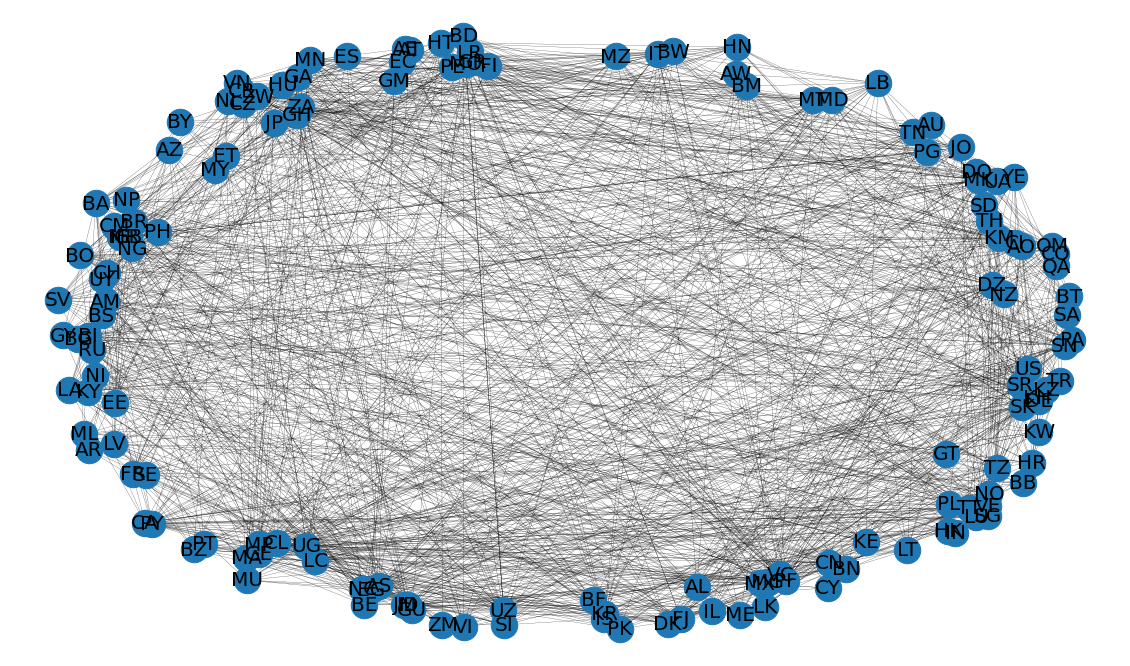

In [82]:
plt.figure(figsize=(20, 12))
elarge = [(u, v) for (u, v, d) in graph.edges(data=True) if d["weight"] > 0]
esmall = [(u, v) for (u, v, d) in graph.edges(data=True) if d["weight"] <= 0]

pos = nx.spring_layout(graph)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(graph, pos, edgelist=elarge, width=.2)
#nx.draw_networkx_edges(
    #graph, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
#)

# labels
nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

## Here is where I will do some Louvain Community Detection:
- If the weights is greater than 2, I will keep the edge
- Will use Louvain to create communities
- Goal is to visualize them on a map

In [83]:
greater_than_0_edge_list = [(u, v) for (u, v, d) in graph.edges(data=True) if d['weight'] > 2]

G_greater_than_0 = nx.Graph(greater_than_0_edge_list)

In [84]:
partition = louvain_community.best_partition(G_greater_than_0)

In [85]:
print(partition)

{'AE': 0, 'MN': 0, 'MR': 1, 'UZ': 0, 'AL': 2, 'AM': 2, 'DE': 2, 'GY': 2, 'IN': 2, 'LR': 2, 'SR': 3, 'TT': 1, 'UY': 2, 'AO': 0, 'GH': 4, 'KZ': 0, 'AR': 3, 'AZ': 3, 'AS': 4, 'CZ': 5, 'JM': 4, 'LB': 3, 'MK': 5, 'MU': 1, 'SA': 4, 'VI': 3, 'AT': 3, 'EG': 3, 'PF': 3, 'AU': 1, 'ZW': 1, 'AW': 1, 'CN': 2, 'KH': 1, 'BI': 5, 'EE': 3, 'BA': 2, 'BB': 2, 'BN': 6, 'PG': 6, 'TR': 2, 'CR': 4, 'GA': 2, 'GE': 7, 'BD': 0, 'ME': 0, 'PY': 7, 'BE': 1, 'BS': 4, 'HT': 1, 'JO': 1, 'KM': 1, 'LK': 1, 'MT': 1, 'SN': 7, 'TN': 1, 'BF': 6, 'BR': 6, 'RU': 6, 'TZ': 7, 'YE': 6, 'BG': 2, 'ES': 2, 'FJ': 2, 'ID': 3, 'CI': 5, 'KE': 3, 'ML': 5, 'MX': 5, 'BM': 4, 'KR': 7, 'BO': 6, 'CO': 6, 'MG': 7, 'CM': 6, 'HU': 6, 'IL': 1, 'NG': 6, 'BT': 0, 'HR': 2, 'JP': 5, 'BW': 3, 'ET': 3, 'BZ': 7, 'CH': 5, 'FR': 7, 'KY': 5, 'UG': 1, 'CA': 1, 'IS': 2, 'MZ': 1, 'CL': 0, 'MP': 0, 'MA': 7, 'GU': 2, 'LA': 6, 'MO': 4, 'CY': 0, 'NC': 6, 'DK': 7, 'DO': 1, 'DZ': 4, 'KW': 4, 'NO': 1, 'SK': 4, 'VC': 0, 'EC': 4, 'OM': 6, 'HN': 6, 'PE': 3, 'FI': 4, 

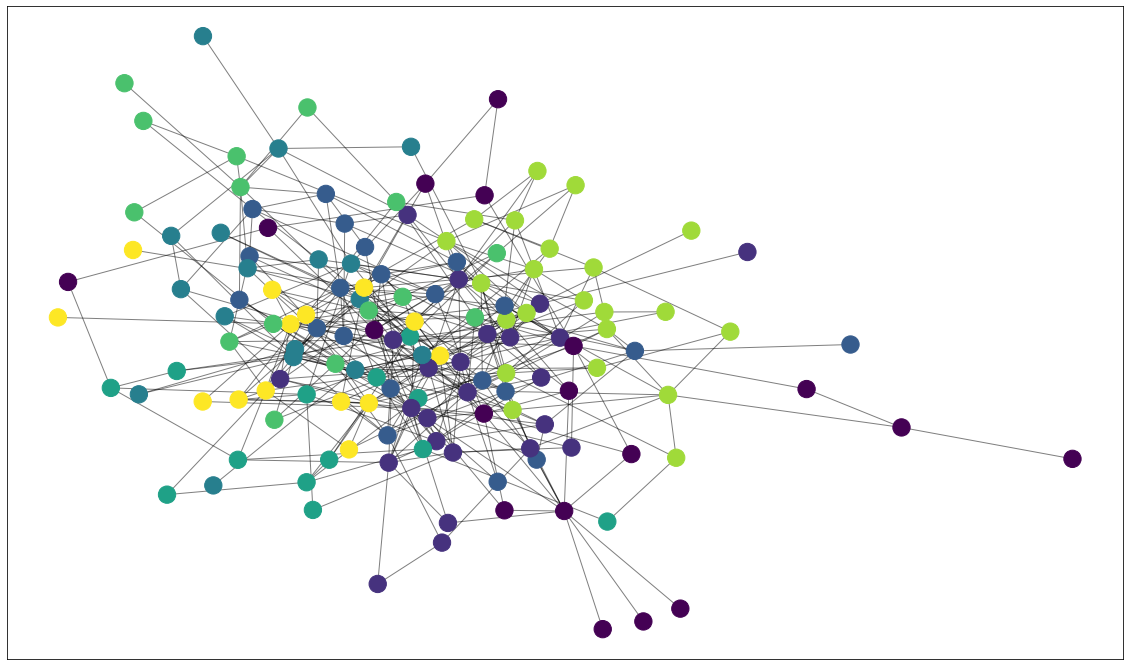

In [86]:
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G_greater_than_0)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_greater_than_0, pos, partition.keys(), node_size=300,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_greater_than_0, pos, alpha=0.5)
plt.show()

In [87]:
print(partition)

{'AE': 0, 'MN': 0, 'MR': 1, 'UZ': 0, 'AL': 2, 'AM': 2, 'DE': 2, 'GY': 2, 'IN': 2, 'LR': 2, 'SR': 3, 'TT': 1, 'UY': 2, 'AO': 0, 'GH': 4, 'KZ': 0, 'AR': 3, 'AZ': 3, 'AS': 4, 'CZ': 5, 'JM': 4, 'LB': 3, 'MK': 5, 'MU': 1, 'SA': 4, 'VI': 3, 'AT': 3, 'EG': 3, 'PF': 3, 'AU': 1, 'ZW': 1, 'AW': 1, 'CN': 2, 'KH': 1, 'BI': 5, 'EE': 3, 'BA': 2, 'BB': 2, 'BN': 6, 'PG': 6, 'TR': 2, 'CR': 4, 'GA': 2, 'GE': 7, 'BD': 0, 'ME': 0, 'PY': 7, 'BE': 1, 'BS': 4, 'HT': 1, 'JO': 1, 'KM': 1, 'LK': 1, 'MT': 1, 'SN': 7, 'TN': 1, 'BF': 6, 'BR': 6, 'RU': 6, 'TZ': 7, 'YE': 6, 'BG': 2, 'ES': 2, 'FJ': 2, 'ID': 3, 'CI': 5, 'KE': 3, 'ML': 5, 'MX': 5, 'BM': 4, 'KR': 7, 'BO': 6, 'CO': 6, 'MG': 7, 'CM': 6, 'HU': 6, 'IL': 1, 'NG': 6, 'BT': 0, 'HR': 2, 'JP': 5, 'BW': 3, 'ET': 3, 'BZ': 7, 'CH': 5, 'FR': 7, 'KY': 5, 'UG': 1, 'CA': 1, 'IS': 2, 'MZ': 1, 'CL': 0, 'MP': 0, 'MA': 7, 'GU': 2, 'LA': 6, 'MO': 4, 'CY': 0, 'NC': 6, 'DK': 7, 'DO': 1, 'DZ': 4, 'KW': 4, 'NO': 1, 'SK': 4, 'VC': 0, 'EC': 4, 'OM': 6, 'HN': 6, 'PE': 3, 'FI': 4, 

In [96]:
groups = {num:[] for num in partition.values()}
for k, v in partition.items():
    groups[v].append(codes.loc[k]['Country'])

KeyError: 'MN'

In [68]:
print(groups[0])

["['United Arab Emirates']", '[]', '[]', "['Uzbekistan']", '[]', "['Chile']", '[]', '[]', '[]', "['United Kingdom']", "['South Africa']", "['Philippines']"]


In [62]:
print(groups[1])

['[]', "['Germany']", '[]']


In [63]:
print(groups[2])

['[]', '[]', "['India']", '[]']


In [64]:
print(groups[3])

['[]', "['Argentina']", "['Azerbaijan']"]


In [65]:
print(groups[4])

['[]']


In [66]:
# something tells me this aint right.........